# Santa Clara County Airbnb Calendar Data Analysis and Visualization

In this analysis, I take a look at the Airbnb listing data on Santa Clara County, California, United States. The data set contains the availability and pricing information on all the Aribnb listings in Santa Clara from November 2019 to November 2020. I'd like to gain insights on the following questions from analyzing this dataset:

1. Locations of Airbnb listings
2. Q2

## Set Up Notebook and Workspace

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from uszipcode import SearchEngine

%matplotlib inline

In [2]:
# Load the data
df = pd.read_csv(
    "http://data.insideairbnb.com/united-states/ca/santa-clara-county/2019-11-07/data/listings.csv.gz"
)

## Data Inspection and Preparation

In [3]:
df.shape

(7658, 106)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7658 entries, 0 to 7657
Columns: 106 entries, id to reviews_per_month
dtypes: float64(24), int64(21), object(61)
memory usage: 6.2+ MB


In [5]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,4952,https://www.airbnb.com/rooms/4952,20191107231003,2019-11-07,Butterfly Inn - Graceful Living !,Lovely garden setting in a serene and art-fill...,Very comfortable Queen bed and small desk in b...,Lovely garden setting in a serene and art-fill...,none,"Located in Professorville, Palo Alto, one of t...",...,f,f,moderate,f,f,5,0,5,0,0.60
1,11464,https://www.airbnb.com/rooms/11464,20191107231003,2019-11-08,Deluxe Private Studio-custom int.,Custom built Studio with exquisite design. Per...,Description A favorite for international corpo...,Custom built Studio with exquisite design. Per...,none,10 min. to Lucky's and Starbucks at El Camino ...,...,t,f,moderate,f,t,15,15,0,0,0.09
2,19181,https://www.airbnb.com/rooms/19181,20191107231003,2019-11-08,Majestic Room #1 with Sauna and Large Family Room,Enjoy your privacy in this spacious and luxuri...,This is a lock-off guest unit in the lower lev...,Enjoy your privacy in this spacious and luxuri...,none,We are located in a 5-minute walk to downtown ...,...,f,f,moderate,t,t,3,1,2,0,0.11
3,21373,https://www.airbnb.com/rooms/21373,20191107231003,2019-11-07,Bonsai Garden Inn in Professorville,Room in gracious home with beautiful garden. ...,"Bright, garden-facing room in beautiful home. ...",Room in gracious home with beautiful garden. ...,none,This room is in an ultra convenient location i...,...,f,f,moderate,f,f,5,0,5,0,2.16
4,23732,https://www.airbnb.com/rooms/23732,20191107231003,2019-11-07,Heart of Silicon Valley bdrm & bath,NaN,You'll have the room to yourself as well as a ...,You'll have the room to yourself as well as a ...,none,NaN,...,f,f,moderate,f,f,1,0,1,0,0.03


In [6]:
# Columns with the most missing values
df.isna().mean().sort_values().tail(20)

review_scores_value             0.187386
jurisdiction_names              0.191564
security_deposit                0.205145
space                           0.247323
host_about                      0.328415
house_rules                     0.333377
neighborhood_overview           0.378036
interaction                     0.409376
access                          0.414991
transit                         0.423087
notes                           0.487595
monthly_price                   0.910943
weekly_price                    0.916166
square_feet                     0.995952
thumbnail_url                   1.000000
license                         1.000000
medium_url                      1.000000
neighbourhood_group_cleansed    1.000000
host_acceptance_rate            1.000000
xl_picture_url                  1.000000
dtype: float64

In [7]:
# Columns contain keywords "review"
df.filter(like="score", axis=1).isna().mean()

review_scores_rating           0.186994
review_scores_accuracy         0.187125
review_scores_cleanliness      0.187125
review_scores_checkin          0.187386
review_scores_communication    0.187255
review_scores_location         0.187255
review_scores_value            0.187386
dtype: float64

In [8]:
## Numerical columns
df.select_dtypes(exclude="object").columns

Index(['id', 'scrape_id', 'thumbnail_url', 'medium_url', 'xl_picture_url',
       'host_id', 'host_acceptance_rate', 'host_listings_count',
       'host_total_listings_count', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'square_feet', 'guests_included', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'license',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'c

In [9]:
# Str columns
df.select_dtypes(include="object").columns

Index(['listing_url', 'last_scraped', 'name', 'summary', 'space',
       'description', 'experiences_offered', 'neighborhood_overview', 'notes',
       'transit', 'access', 'interaction', 'house_rules', 'picture_url',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed', 'city', 'state',
       'zipcode', 'market', 'smart_location', 'country_code', 'country',
       'is_location_exact', 'property_type', 'room_type', 'bed_type',
       'amenities', 'price', 'weekly_price', 'monthly_price',
       'security_deposit', 'cleaning_fee', 'extra_people', 'calendar_updated',
       'has_availability', 'calendar_last_scraped', 'first_review',
       'last_review', 'requires_license', 'jurisdictio

### Closer look at the price data

In [21]:
df['price'].head()

0     $90.00
1     $85.00
2    $100.00
3     $99.00
4    $299.00
Name: price, dtype: object

We need to convert the 'price' column from string to numerical type

In [26]:
df['price'] = df['price'].replace('[^.0-9]', '', regex=True).astype(float)


### Closer look a the location data
We are interested in analyzing listing trend by locations (city/zipcode), so let's exam if we have clean location location data

In [10]:
# check to see if there are missing values in the location columns
df[["city", "zipcode", "latitude", "longitude"]].isna().sum()

city          19
zipcode      395
latitude       0
longitude      0
dtype: int64

In [11]:
# check if the city data is clean

df["city"].value_counts()

San Jose              3165
Palo Alto              833
Mountain View          820
Sunnyvale              816
Santa Clara            703
Cupertino              335
Milpitas               306
Campbell               130
Los Gatos              128
Los Altos               94
Saratoga                85
Morgan Hill             59
Los Altos Hills         54
Gilroy                  37
Monte Sereno            19
San Martin              16
Menlo Park               6
Palo Alto                6
Stanford                 5
San Jose                 4
Hollister                2
Sunnyvale                2
Santa Clara County       1
Danville                 1
Campbell                 1
San Francisco            1
Los Gatos                1
洛斯阿尔托斯                   1
santa clara              1
los Altos                1
Milpitas                 1
Sanjose                  1
Mountain View            1
帕洛阿尔托                    1
san jose                 1
East Palo Alto           1
Name: city, dtype: int64

The `city` data column needs to be cleaned up if we want to use it as a catagorical variable. 
- capitalization error: san jose ->
- foreign language: 帕洛阿尔托 -> Palo Alto

In [12]:
# check if the zipcode column is clean

df["zipcode"].value_counts()

94306                369
95112                344
95014                307
95035                305
94043                291
                    ... 
95215                  1
94028                  1
CA 95128               1
95009                  1
9503\n9503\n95035      1
Name: zipcode, Length: 72, dtype: int64

In addition to the problem of having 395 missing values, the `zipcode` column also contain data with inconsistent format:
- multiple zipcode `9503\n9503\n95035`
- more than 5 digits `95032-4635`

Since the map coordinates data are available for all the listings/rows in the dataframe, we can easily fill in the missing data and clean up the data in the `city` and `zipcode` columns with the `uszipcode` package 

In [13]:
# use uszipcode package to get zipcode and city info from coordinates
from uszipcode import SearchEngine

search = SearchEngine(simple_zipcode=True)

city_list = []
zipcode_list = []

## Loop throuh each row, and get updated city/zipcode info based on coordinates
for lat, lng in zip(df["latitude"], df["longitude"]):
    res = search.by_coordinates(lat=lat, lng=lng, radius=10, returns=1)[0]
    city = res.major_city
    zipcode = res.zipcode

    city_list.append(city)
    zipcode_list.append(zipcode)

## add new_city and new_zipcode columns to the df for later use
df["new_city"] = city_list
df["new_zipcode"] = zipcode_list

# Number of Listings and Pricings by Zipcode

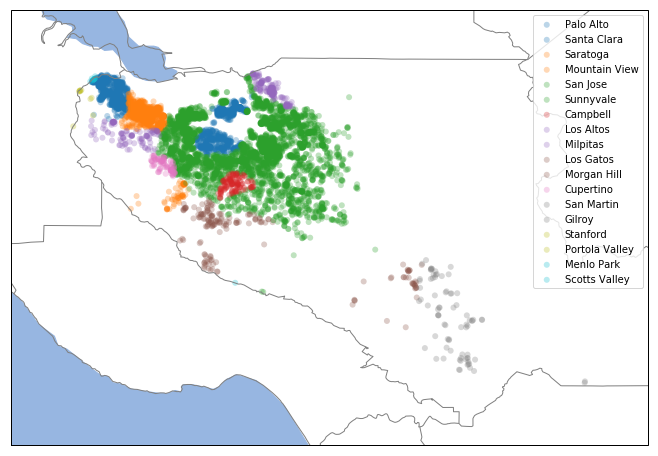

In [140]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
import seaborn as sns
import warnings

warnings.filterwarnings(action="once")

## shape file with US county info
## https://catalog.data.gov/dataset/tiger-line-shapefile-2017-nation-u-s-current-county-and-equivalent-national-shapefile

fname = "data/countyl010g_shp_nt00964/countyl010g.shp"
reader = shpreader.Reader(fname)
counties = list(reader.geometries())
COUNTIES = cfeature.ShapelyFeature(counties, ccrs.PlateCarree())

## draw a map with US county lines
plt.figure(figsize=(18, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.OCEAN.with_scale("10m"))
ax.add_feature(cfeature.LAKES.with_scale("10m"))
ax.add_feature(COUNTIES, facecolor="None", edgecolor="gray")

## zoom-in to the Santa Clara County 
BBox = [
    df.longitude.min() - 0.1,
    df.longitude.max() + 0.1,
    df.latitude.min() - 0.1,
    df.latitude.max() + 0.1,
]
ax.set_extent(BBox)

## Set colors for different cities within Santa Clara County
cities = df['new_city'].unique()
colors = [plt.cm.tab10(i/float(len(cities)-1)) for i in range(len(cities))]

for i, city in enumerate(cities):
    plt.scatter(
        "longitude",
        "latitude",
        data=df.loc[df.new_city == city, :],
        c=colors[i],
        label=str(city),
        edgecolors="None",
        linewidths=0.2,
        alpha=0.3,
    )
ax.legend();


In [116]:
for i,j,k in zip(lat,lon,cities):
    print(i,j,k)

37.282960909090896 -121.94143280303027 Campbell
37.313364044943825 -122.05229303370781 Cupertino
36.99565199999999 -121.55287700000001 Gilroy
37.362611018518514 -122.10906444444443 Los Altos
37.21625875000001 -121.97037772058823 Los Gatos
37.450694999999996 -122.16553400000001 Menlo Park
37.43384854651163 -121.88316709302333 Milpitas
37.12329138888888 -121.67261277777776 Morgan Hill
37.39385126840313 -122.08190010192519 Mountain View
37.43038520231209 -122.13734991907506 Palo Alto
37.37536 -122.19788 Portola Valley
37.32949556113412 -121.89473241287664 San Jose
37.09333413793102 -121.60541034482759 San Martin
37.375315187424434 -121.95871834340991 Santa Clara
37.26658639344262 -122.03324672131147 Saratoga
37.12533 -121.93907 Scotts Valley
37.425084444444444 -122.1808388888889 Stanford
37.3691840580566 -122.02160641203716 Sunnyvale


Text(0.5,1,'Santa Clara County Airbnb Listings by City: Count and Price')

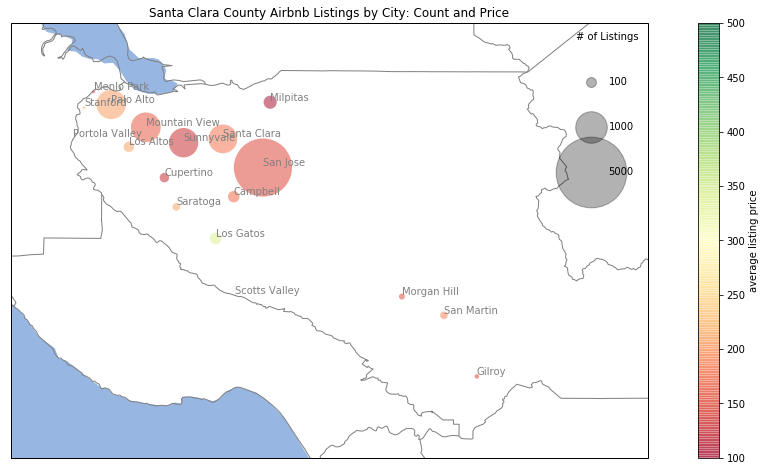

In [139]:
import numpy as np

#Extract the data we're interested in
lat = df.groupby('new_city').mean()['latitude']
lon = df.groupby('new_city').mean()['longitude']
avg_price = df.groupby('new_city').mean()['price']
listing_count = df.groupby('new_city').count()['latitude']
cities = lat.index.to_list()

## draw a map with US county lines
plt.figure(figsize=(18, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.OCEAN.with_scale("10m"))
ax.add_feature(cfeature.LAKES.with_scale("10m"))
ax.add_feature(COUNTIES, facecolor="None", edgecolor="gray")

## zoom-in to the Santa Clara County 
BBox = [
    df.longitude.min() - 0.1,
    df.longitude.max() + 0.1,
    df.latitude.min() - 0.1,
    df.latitude.max() + 0.1,
]
ax.set_extent(BBox)


# Scatter the points, using size and color but no label
plt.scatter(lon, lat, label=None,
            c=avg_price, cmap='RdYlGn',
            s=listing_count, linewidth=0, alpha=0.5,
           )
plt.axis(aspect='equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='average listing price')
plt.clim(100, 500)


# Here we create a legend:
# we'll plot empty lists with the desired size and label
for count in [100, 1000, 5000]:
    plt.scatter([], [], c='k', alpha=0.3, s=count,
                label=str(count))
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=3.5, title='# of Listings')

# Add text anotation for all the cities
style = dict(size=10, color='gray')

for i,j,k in zip(lon,lat,cities):
    ax.text(i,j,k, **style, va = 'bottom', ha = 'left')



plt.title("Santa Clara County Airbnb Listings by City: Count and Price")



In [193]:
df.groupby('new_city').mean()[['latitude','longitude']]

,latitude,longitude
new_city,,
Campbell,37.282961,-121.941433
Cupertino,37.313364,-122.052293
Gilroy,36.995652,-121.552877
Los Altos,37.362611,-122.109064
Los Gatos,37.216259,-121.970378
Menlo Park,37.450695,-122.165534
Milpitas,37.433849,-121.883167
Morgan Hill,37.123291,-121.672613
Mountain View,37.393851,-122.081900


In [ ]:
# cut the review_scores_rating into 10 bins
bins = list(range(0, 110, 10))
lst_df["ratings"] = pd.cut(lst_df["review_scores_rating"], bins)

In [ ]:
# How many listings fall under each rating
lst_df.groupby("ratings").count()["id"].plot(kind="bar")

### Is higher rated listing more expensive?

In [ ]:
# convert price column data type from object to float
lst_df["price"] = lst_df["price"].replace("[\$,]", "", regex=True).astype(float)

# plot average listing price against review scores
lst_df.groupby("ratings")[["price"]].mean().plot(kind="bar")

### How does host response time impact customer satisfaction?

In [ ]:
lst_df.groupby("host_response_time").mean()["review_scores_rating"].plot.bar()

### Most expensive zipcode

In [ ]:
lst_df.groupby(["zipcode"])["price"].agg(["mean", "count"]).sort_values(
    "mean", ascending=False
)

### Does super host's room command a premium

In [ ]:
lst_df.groupby(["host_is_superhost"])["review_scores_rating"].agg(
    ["mean", "count"]
).sort_values("mean", ascending=False)

In [ ]:
lst_df.groupby(["host_is_superhost"])["price"].agg(["mean", "count"]).sort_values(
    "mean", ascending=False
)